In [ ]:
# 🔧 IMPORT REQUIRED LIBRARIES
# ============================

# Core data analysis
import warnings

# Visualization libraries
import matplotlib.pyplot as plt

# Configuration
warnings.filterwarnings('ignore', category=FutureWarning)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


✅ Libraries imported successfully!
📊 Enhanced visualization: Seaborn=True, Plotly=True


In [13]:
# 🔍 CONFIGURATION PARAMETERS
# ===========================
# Modify these parameters to customize the analysis

# Data source configuration
BY_BAG_FOLDER = "exports/by_bag"  # Path to CSV files

# Analysis parameters
BAG_SELECTION = "2024-08-22_14-06-43"  # None for all bags, or specify like "2024-08-22_14-06-43"
SENSOR_SELECTION = None  # None for all sensors, or specify like ["bottomtrack", "ins"]

# Export settings
EXPORT_SUMMARY = True  # Export data summary to CSV
EXPORT_PLOTS = False   # Save plots to files
OUTPUT_FOLDER = "exports/outputs"  # Output folder for exports

print("⚙️  Configuration loaded:")
print(f"   📂 Data folder: {BY_BAG_FOLDER}")
print(f"   📅 Bag selection: {BAG_SELECTION or 'All bags'}")
print(f"   🔧 Sensor selection: {SENSOR_SELECTION or 'All sensors'}")
print(f"   💾 Export summary: {EXPORT_SUMMARY}")
print(f"   📊 Export plots: {EXPORT_PLOTS}")

⚙️  Configuration loaded:
   📂 Data folder: exports/by_bag
   📅 Bag selection: 2024-08-22_14-06-43
   🔧 Sensor selection: All sensors
   💾 Export summary: True
   📊 Export plots: False


In [14]:
# Run the refactored notebook workflow from utils.nucleus1000dvl_analysis
from utils import nucleus1000dvl_analysis as dvl_utils
print('🚀 Running consolidated Nucleus1000DVL analysis workflow (utils)')
workflow_result = dvl_utils.run_full_notebook_workflow(by_bag_folder=BY_BAG_FOLDER,
                                                     bag_selection=BAG_SELECTION,
                                                     sensor_selection=SENSOR_SELECTION,
                                                     export_summary=EXPORT_SUMMARY,
                                                     export_plots=EXPORT_PLOTS,
                                                     output_folder=OUTPUT_FOLDER)
print('Workflow result:', workflow_result)

🚀 Running consolidated Nucleus1000DVL analysis workflow (utils)
🚀 Running full Nucleus1000DVL notebook workflow...
🔍 Found DVL data:
   📅 Bags: 5
   📊 Sensors: 8
   Sensors: altimeter, bottomtrack, imu, ins, magnetometer, sensor_dvl_position, sensor_dvl_velocity, watertrack

📋 Data Discovery Summary:
   📅 Available bags: 5
   🔧 Available sensors: 8

📅 Using bag: 2024-08-22_14-06-43

📊 Basic data exploration for selected bag

🔧 ALTIMETER Data:
   📏 Shape: (17, 21)
   ⏱️  Duration: 0.6 minutes

🔧 BOTTOMTRACK Data:
   📏 Shape: (52, 35)
   ⏱️  Duration: 0.6 minutes

🔧 IMU Data:
   📏 Shape: (3580, 24)
   ⏱️  Duration: 0.6 minutes

🔧 INS Data:
   📏 Shape: (366, 50)
   ⏱️  Duration: 0.6 minutes

🔧 MAGNETOMETER Data:
   📏 Shape: (2039, 20)
   ⏱️  Duration: 0.6 minutes

🔧 SENSOR_DVL_POSITION Data:
   ❌ No data available

🔧 SENSOR_DVL_VELOCITY Data:
   ❌ No data available

🔧 WATERTRACK Data:
   📏 Shape: (53, 35)
   ⏱️  Duration: 0.6 minutes

🚀 Generating plots (may open interactive windows if en


📈 Running multi-file comparisons across bags...



📊 Computing summary statistics...

📋 Overall Summary: 17 datasets
💾 Summary exported to: exports/outputs/nucleus1000dvl_detailed_summary.csv

🎛️ Creating interactive dashboard...
📊 Dashboard saved to: exports/outputs/nucleus1000dvl_dashboard.html

🔍 Running DVL sensor comparison...
🔄 Comparing DVL sensors for bag: 2024-08-22_14-06-43



✅ Notebook workflow complete.
Workflow result: {'status': 'done', 'selected_bag': '2024-08-22_14-06-43'}


In [15]:
# 🔍 FILE DISCOVERY AND DATA LOADING — compact
print("🔍 Discovering Nucleus1000DVL data files...")
analyzer = dvl_utils.Nucleus1000DVLAnalyzer(BY_BAG_FOLDER)
print(f"📋 Data Discovery: {len(analyzer.available_bags)} bags, {len(analyzer.available_sensors)} sensors")
# Print a short summary (detailed summaries can be produced with analyzer.get_summary())
analyzer.get_summary()

🔍 Discovering Nucleus1000DVL data files...
🔍 Found DVL data:
   📅 Bags: 5
   📊 Sensors: 8
   Sensors: altimeter, bottomtrack, imu, ins, magnetometer, sensor_dvl_position, sensor_dvl_velocity, watertrack
📋 Data Discovery: 5 bags, 8 sensors
📊 Nucleus1000DVL Data Summary

🔧 ALTIMETER:
   📅 2024-08-20_13-39-34: No data
   📅 2024-08-20_13-40-35: No data
   📅 2024-08-22_14-06-43: 17 samples, 0.6 min
   📅 2024-08-22_14-29-05: 31 samples, 1.0 min
   📅 2024-08-22_14-47-39: 20 samples, 0.7 min

🔧 BOTTOMTRACK:
   📅 2024-08-20_13-39-34: No data
   📅 2024-08-20_13-40-35: No data
   📅 2024-08-22_14-06-43: 52 samples, 0.6 min
   📅 2024-08-22_14-29-05: 81 samples, 1.0 min
   📅 2024-08-22_14-47-39: 62 samples, 0.7 min

🔧 IMU:
   📅 2024-08-20_13-39-34: No data
   📅 2024-08-20_13-40-35: No data
   📅 2024-08-22_14-06-43: 3580 samples, 0.6 min
   📅 2024-08-22_14-29-05: 6034 samples, 1.0 min
   📅 2024-08-22_14-47-39: 4400 samples, 0.7 min

🔧 INS:
   📅 2024-08-20_13-39-34: No data
   📅 2024-08-20_13-40-35: N

In [16]:
# 📊 BASIC DATA EXPLORATION — compact
# Choose bag (uses BAG_SELECTION or falls back to first available)
if BAG_SELECTION and BAG_SELECTION in analyzer.available_bags:
    selected_bag = BAG_SELECTION
elif analyzer.available_bags:
    selected_bag = analyzer.available_bags[0]
    print(f"📅 Auto-selected bag: {selected_bag}")
else:
    selected_bag = None

if selected_bag:
    analyzer.explore_bag(selected_bag)
else:
    print("❌ No bag available for exploration")


🔍 Exploring bag: 2024-08-22_14-06-43

🔧 ALTIMETER Data:
   📏 Shape: (17, 21)
   ⏱️  Duration: 0.6 minutes

🔧 BOTTOMTRACK Data:
   📏 Shape: (52, 35)
   ⏱️  Duration: 0.6 minutes

🔧 IMU Data:
   📏 Shape: (3580, 24)
   ⏱️  Duration: 0.6 minutes

🔧 INS Data:
   📏 Shape: (366, 50)
   ⏱️  Duration: 0.6 minutes

🔧 MAGNETOMETER Data:
   📏 Shape: (2039, 20)
   ⏱️  Duration: 0.6 minutes

🔧 SENSOR_DVL_POSITION Data:
   ❌ No data available

🔧 SENSOR_DVL_VELOCITY Data:
   ❌ No data available

🔧 WATERTRACK Data:
   📏 Shape: (53, 35)
   ⏱️  Duration: 0.6 minutes


In [17]:
# 🚀 BOTTOM TRACK VELOCITY VISUALIZATION — compact
if 'bottomtrack' in analyzer.available_sensors:
    if BAG_SELECTION:
        analyzer.plot_bottomtrack_velocity(BAG_SELECTION, interactive=(PLOT_STYLE == "interactive"))
    else:
        analyzer.plot_bottomtrack_velocity(None, interactive=(PLOT_STYLE == "interactive"))
else:
    print("⚠️  No bottom track data available")

In [18]:
# 🗺️ SPATIAL DATA VISUALIZATION - TRAJECTORIES — compact
if 'ins' in analyzer.available_sensors:
    if BAG_SELECTION:
        analyzer.plot_trajectory_2d(BAG_SELECTION, interactive=(PLOT_STYLE == "interactive"))
    else:
        analyzer.plot_trajectory_2d(None, interactive=(PLOT_STYLE == "interactive"))
else:
    print("⚠️  No INS data available for trajectory plotting")

In [19]:
# 🧭 INS DATA VISUALIZATION — compact
if 'ins' in analyzer.available_sensors:
    ins_variables = ['position', 'velocity', 'quaternion']
    if BAG_SELECTION:
        analyzer.plot_ins_data(BAG_SELECTION, variables=ins_variables, interactive=(PLOT_STYLE == "interactive"))
    else:
        first_bag = analyzer.available_bags[0] if analyzer.available_bags else None
        if first_bag:
            analyzer.plot_ins_data(first_bag, variables=ins_variables, interactive=(PLOT_STYLE == "interactive"))
else:
    print("⚠️  No INS data available")

📊 Comparing bottomtrack across 5 bags


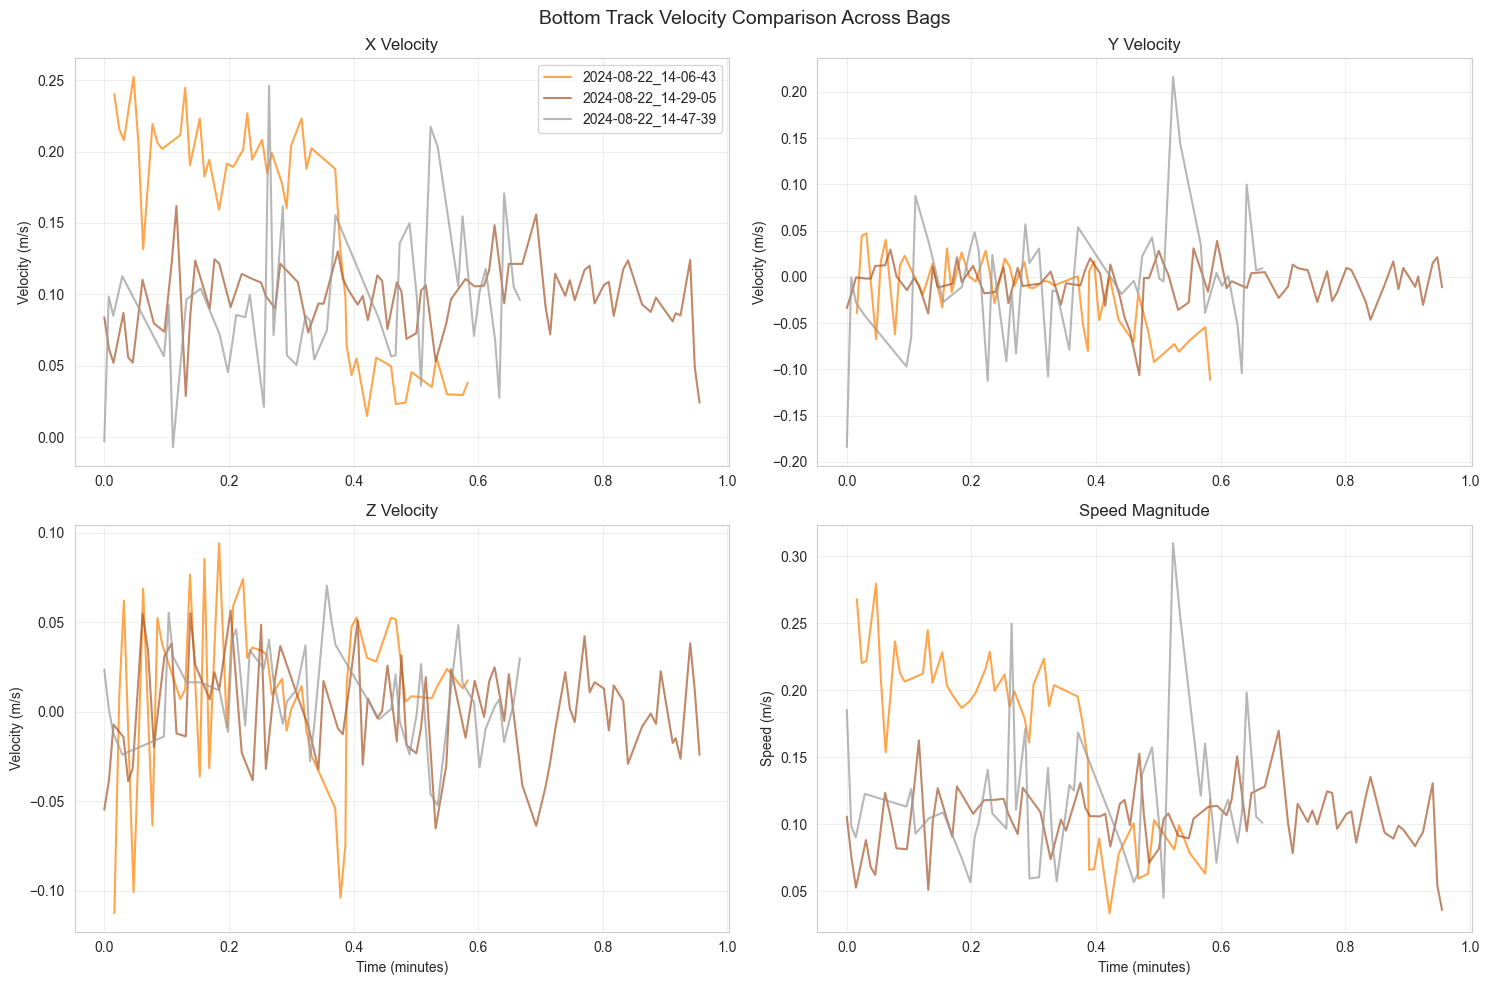

In [20]:
# 📈 MULTI-FILE COMPARISON ANALYSIS — compact
if len(analyzer.available_bags) > 1:
    analyzer.compare_bottomtrack_across_bags(output_folder=OUTPUT_FOLDER, export_plots=EXPORT_PLOTS)
else:
    print("⚠️  Only one bag available - skipping comparison analysis")

In [21]:
# 📊 STATISTICAL SUMMARY AND METRICS — compact
summary_df = analyzer.compute_summary_stats(export_summary=EXPORT_SUMMARY, output_folder=OUTPUT_FOLDER)
if not summary_df.empty:
    print(f"Generated summary for {len(summary_df)} datasets")
    display(summary_df.head(10))
else:
    print("⚠️ No summary statistics generated")

💾 Summary exported to: exports/outputs/nucleus1000dvl_detailed_summary.csv
Generated summary for 17 datasets


,sensor,bag,samples,duration_min,sample_rate_hz,mean_speed,std_speed,valid_percent
0,altimeter,2024-08-22_14-06-43,17,0.564162,0.502220,NaN,NaN,NaN
1,altimeter,2024-08-22_14-29-05,31,1.002527,0.515364,NaN,NaN,NaN
2,altimeter,2024-08-22_14-47-39,20,0.666027,0.500480,NaN,NaN,NaN
3,bottomtrack,2024-08-22_14-06-43,52,0.583144,1.486196,0.168106,0.064454,90.384615
4,bottomtrack,2024-08-22_14-29-05,81,0.955224,1.413281,0.103959,0.023894,98.765432
5,bottomtrack,2024-08-22_14-47-39,62,0.666893,1.549473,0.118712,0.054261,74.193548
6,imu,2024-08-22_14-06-43,3580,0.624660,95.518665,NaN,NaN,NaN
7,imu,2024-08-22_14-29-05,6034,1.047727,95.985590,NaN,NaN,NaN
8,imu,2024-08-22_14-47-39,4400,0.746314,98.260668,NaN,NaN,NaN
9,ins,2024-08-22_14-06-43,366,0.637416,9.569885,NaN,NaN,NaN


In [22]:
# 📊 DVL SENSOR COMPARISON ANALYSIS — compact
import importlib
importlib.reload(dvl_utils)
analyzer = dvl_utils.Nucleus1000DVLAnalyzer(BY_BAG_FOLDER)
selected_bag = selected_bag if 'selected_bag' in globals() else (analyzer.available_bags[0] if analyzer.available_bags else None)
if selected_bag:
    analyzer.compare_dvl_sensors(selected_bag, interactive=(PLOT_STYLE=='interactive'))
else:
    print("❌ No bag available for DVL comparison")

🔍 Found DVL data:
   📅 Bags: 5
   📊 Sensors: 8
   Sensors: altimeter, bottomtrack, imu, ins, magnetometer, sensor_dvl_position, sensor_dvl_velocity, watertrack
🔄 Comparing DVL sensors for bag: 2024-08-22_14-06-43


In [23]:
# 🧭 NAVIGATION AND GUIDANCE SYSTEM ANALYSIS — compact
import importlib
importlib.reload(dvl_utils)
analyzer = dvl_utils.Nucleus1000DVLAnalyzer(BY_BAG_FOLDER)
analysis_bag = selected_bag if 'selected_bag' in globals() else (analyzer.available_bags[0] if analyzer.available_bags else None)
if analysis_bag:
    success = analyzer.run_navigation_guidance_analysis(analysis_bag, interactive=(PLOT_STYLE=='interactive'))
    if not success:
        print("⚠️ Navigation/guidance analysis failed or is partially complete")
else:
    print("❌ No bag available for navigation/guidance analysis")

🔍 Found DVL data:
   📅 Bags: 5
   📊 Sensors: 8
   Sensors: altimeter, bottomtrack, imu, ins, magnetometer, sensor_dvl_position, sensor_dvl_velocity, watertrack
🔍 Found Navigation/Guidance data:
   📅 Bags: 5
   📊 Sensors: 3
   Sensors: guidance, navigation_plane_approximation, navigation_plane_approximation_position
📁 Running navigation/guidance analysis for bag: 2024-08-22_14-06-43
📁 Loaded guidance__2024-08-22_14-06-43_data.csv: 317 rows, 30 columns
🎯 Analyzing guidance errors for bag: 2024-08-22_14-06-43


📁 Loaded navigation_plane_approximation__2024-08-22_14-06-43_data.csv: 322 rows, 23 columns
📁 Loaded navigation_plane_approximation_position__2024-08-22_14-06-43_data.csv: 156 rows, 22 columns
🧭 Analyzing navigation plane for bag: 2024-08-22_14-06-43


📁 Loaded guidance__2024-08-22_14-06-43_data.csv: 317 rows, 30 columns
📁 Loaded navigation_plane_approximation__2024-08-22_14-06-43_data.csv: 322 rows, 23 columns
📁 Loaded navigation_plane_approximation_position__2024-08-22_14-06-43_data.csv: 156 rows, 22 columns
⚖️  Comparing navigation and guidance for bag: 2024-08-22_14-06-43

📊 Data Summary:
  - Guidance samples: 317
  - Navigation plane samples: 322
  - Navigation position samples: 156

🕐 Sampling Rates:
  - Guidance: 554.0 samples/min
  - Navigation plane: 555.2 samples/min
